# Digital Lost Pet Matching System (CIS 515 Final Project)

This notebook demonstrates a simple computer vision application to help identify lost pets using image similarity.

**Key Idea**: Given a photo of a lost pet, we compare it to a small database of found pet images using pretrained ResNet-50 and cosine similarity. This mimics the behavior of modern pet-finding platforms like the LOSTPAW system, but is simplified for prototyping.

**Technologies Used**:
- PyTorch + torchvision (ResNet-50)
- Cosine similarity (scikit-learn)
- PIL for image handling
- Matplotlib for visualization

Author: Luna Hsieh
Date: April 2025  

In [19]:
# Step 1: Import Required Libraries
# These handle deep learning (torch), image processing (PIL), similarity computation, and display.

import os
from PIL import Image
import torch
from torchvision import models, transforms
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Error with .DS_Store: cannot identify image file '/Users/luns/Desktop/pet_database/.DS_Store'

🔍 Top Matches:
petM1.jpeg → Similarity Score: 0.7462
petE1.jpeg → Similarity Score: 0.7246
petG1.jpeg → Similarity Score: 0.6913


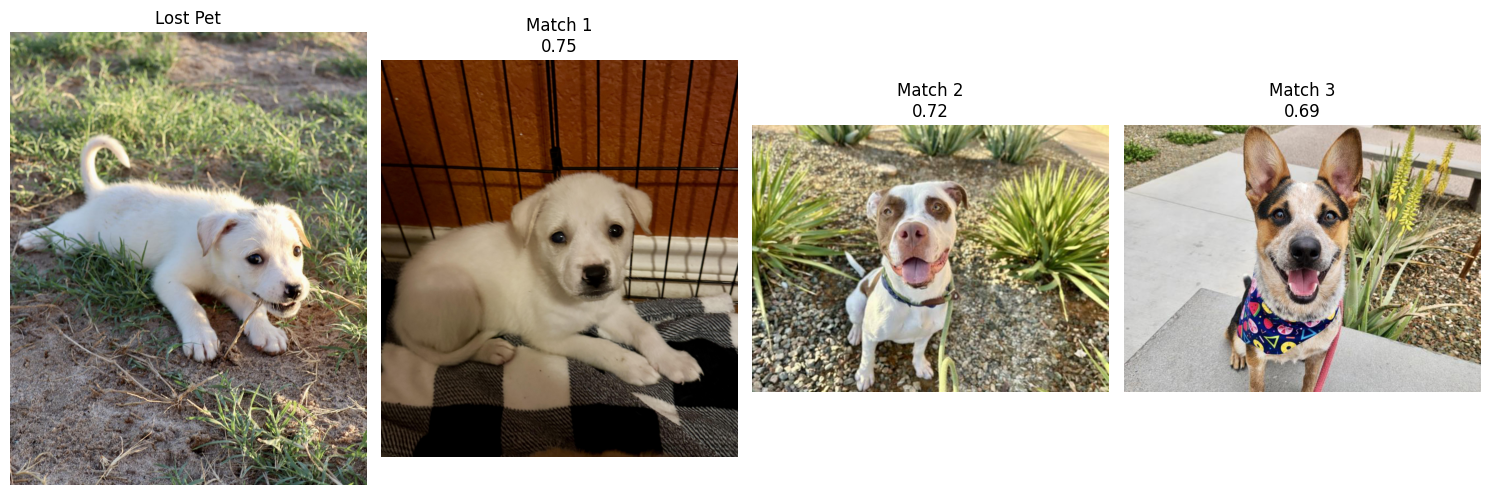

In [21]:
# Step 2: Define Paths
lost_pet_path = "lost_pet.jpeg"
database_folder = "pet_database"

# Step 3: Load Pretrained ResNet-50 (remove final layer)
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # remove FC
model.eval()

# Step 4: Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Step 5: Feature Extraction Function
def get_features(image_path):
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0)
    with torch.no_grad():
        features = model(img).squeeze().numpy()
    return features

# Step 6: Get Lost Pet Features
lost_pet_feat = get_features(lost_pet_path)

# Step 7: Compare with Database
results = []
for fname in os.listdir(database_folder):
    fpath = os.path.join(database_folder, fname)
    try:
        feat = get_features(fpath)
        score = cosine_similarity([lost_pet_feat], [feat])[0][0]
        results.append((fname, score))
    except Exception as e:
        print(f"Error with {fname}: {e}")

# Step 8: Sort by Similarity
top_matches = sorted(results, key=lambda x: x[1], reverse=True)[:3]

# Step 9: Show Results
print("\n🔍 Top Matches:")
for fname, score in top_matches:
    print(f"{fname} → Similarity Score: {score:.4f}")

def show_top_matches(lost_path, matches, database_folder):
    fig, axs = plt.subplots(1, len(matches) + 1, figsize=(15, 5))

    # Show lost pet
    axs[0].imshow(Image.open(lost_path))
    axs[0].set_title("Lost Pet")
    axs[0].axis('off')

    # Show matches
    for i, (fname, score) in enumerate(matches):
        match_path = os.path.join(database_folder, fname)
        axs[i + 1].imshow(Image.open(match_path))
        axs[i + 1].set_title(f"Match {i+1}\n{score:.2f}")
        axs[i + 1].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your results
show_top_matches(lost_pet_path, top_matches, database_folder)

## Key Takeaways

- This notebook implements a prototype for matching pet images using deep feature embeddings.
- It uses transfer learning from ResNet-50 to extract meaningful features from images.
- Cosine similarity measures how close images are in feature space.
- The model is not trained — just using pretrained weights for fast testing.

Future Study : try fine-tuning, training contrastive loss, or switching to ViT for LOSTPAW-style performance.